# Example

We build a simple model using the cruise_ship_info.csv data set for predicting a ship's crew size. This project is organized as follows: (a) data proprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## Importing data from a `csv` file and exploring the dataset

In [2]:
df=pd.read_csv("cruise_ship_info.csv")
df.head() # This function returns the first n rows for the object based on position. 
#It is useful for quickly testing if your object has the right type of data in it.

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [3]:
# This method prints information about a DataFrame including:
# index dtype and column dtypes, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [4]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


To quantify the degree of correlation, we calculate the covariance matrix.
First, using [SciKitLearn preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) will fit the model. 

There are different [scaler functions](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py) available in sklearn. 
For example, in [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer), each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one. In [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler), it scales features using statistics that are robust to outliers.
On the contrary, in [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) we can standardize features by removing the mean and scaling to unit variance. 


In [5]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew'] 

from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, MinMaxScaler

# Almost everything in Python is an object
# We can name a Class to create an object and use its methods
stdsc = StandardScaler() 
nmlr = Normalizer()
rbsc = RobustScaler()

# First, we wanto to select the values from the columns that we want to use. 
# Then we will fit to data, then transform it with 'fit_transform' function
df_std = stdsc.fit_transform(df[cols].values)
df_nm = nmlr.fit_transform(df[cols].values)
df_rb = rbsc.fit_transform(df[cols].values)

Lets plot different preprocessing functions to see how they result...

Text(0.5, 1.0, 'RobustScaler')

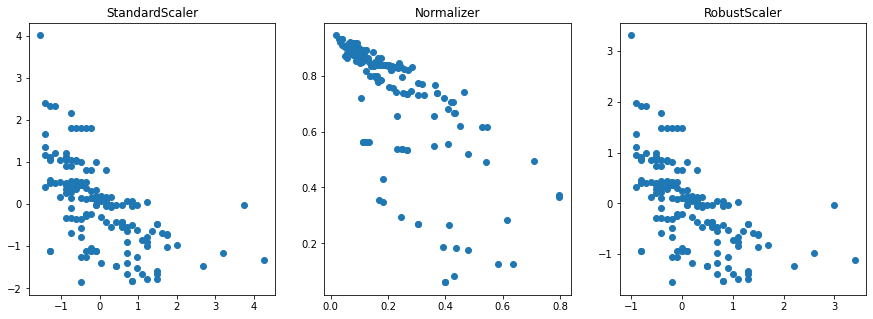

In [6]:
fig, axes = plt.subplots(1, 3,figsize=(15,5))

axes[0].scatter(df_std[:,0], df_std[:,1])
axes[0].set_title("StandardScaler")

axes[1].scatter(df_nm[:,0], df_nm[:,1])
axes[1].set_title("Normalizer")

axes[2].scatter(df_rb[:,0], df_rb[:,1])
axes[2].set_title("RobustScaler")

For this exercise, we will use the StandardScaler. 
During the course you will see how to select one or another for different purposes.

To quantify the degree of correlation, we calculate the covariance matrix.

In [7]:
xc = np.cov(df_std.T) # Applies covariance to dataset

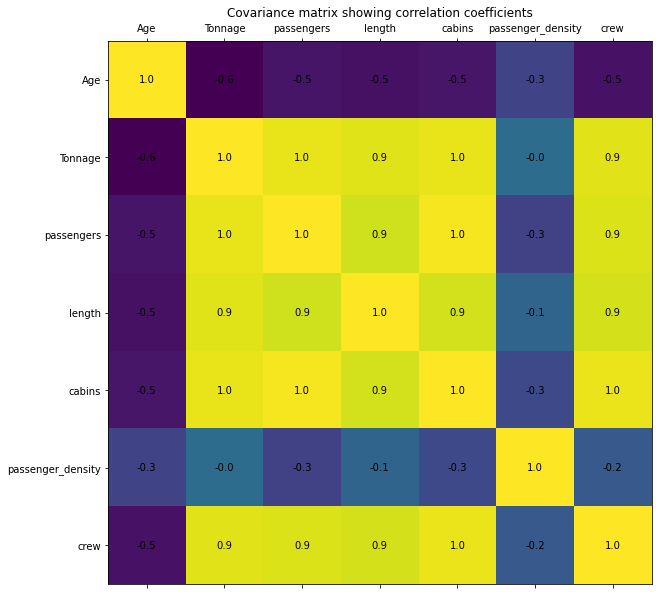

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(xc) # Draws a matrix

## To see the numbers in the plot
for (i, j), z in np.ndenumerate(xc): 
    # ndenumerate function for generating multidimensional index iterator.
    ax.text(i, j, '{:0.1f}'.format(z), ha='center', va='center')
    # adds a text into the plot where i and j are the coordinates
    # and z is the assigned number 

## adding titles
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols)

plt.title('Covariance matrix showing correlation coefficients', size = 12)
plt.show()

From the covariance matrix plot above, if we assume important features have a correlation coefficient of 0.6 or greater, then we see that the “crew” variable correlates strongly with 4 predictor variables: “tonnage”, “passengers”, “length, and “cabins”.

In [9]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
  
df[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


You can do the same with integrers. `.iloc[]` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.



In [10]:
# Same logic with slice can be used.
df.iloc[:,[3,4,5,6,8]].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In summary, we’ve shown how a covariance matrix can be used for variable selection and dimensionality reduction. We’ve reduced the original dimension from 6 to 4.